In [1]:
import rpy2
%load_ext rpy2.ipython

C:\Users\Joseph\anaconda3\lib\site-packages\rpy2\robjects\packages.py:365: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd


In [3]:
"""
find_fourth_spread 
"""
def _first_value_greater_than_min(list_given: list, minimum: int) -> int:
    list_copy = list_given.copy()
    list_copy.sort()
    for i in list_copy:
        if i > minimum:
            return i


def _first_value_less_than_max(list_given: list, maximum: int) -> int:
    list_copy = list_given.copy()
    list_copy.sort()
    list_copy.reverse()
    for i in list_copy:
        if i < maximum:
            return i


def find_fourth_spread(list_given: list):
    list_given.sort()

    length_list = len(list_given)
    split_size = int(length_list / 2 if length_list % 2 == 0 else length_list // 2 + 1)

    # Middle line in Box in Box plot
    median = np.median(list_given)

    # Split lists
    lower_half = list_given[:split_size]
    upper_half = list_given[-split_size:]

    # Left part of Box in Box plot
    lower_fourth = np.median(lower_half)

    # Right part of Box in Box plot
    upper_fourth = np.median(upper_half)

    # Range of Box plot
    fourth_spread = upper_fourth - lower_fourth

    # Min and Max Limit before values become outliers
    outlier_lower = lower_fourth - 1.5 * fourth_spread
    outlier_upper = upper_fourth + 1.5 * fourth_spread

    # Minimum tail for Box Plot
    minimum_tail_before_outlier = _first_value_greater_than_min(list_given, outlier_lower)

    # Maximum tail for Box Plot
    maximum_tail_before_outlier = _first_value_less_than_max(list_given, outlier_upper)

    outlier_lower_ex = lower_fourth - 3 * fourth_spread
    outlier_upper_ex = upper_fourth + 3 * fourth_spread

    return fourth_spread, median, lower_fourth, upper_fourth, outlier_lower, outlier_upper, outlier_lower_ex, outlier_upper_ex, minimum_tail_before_outlier, maximum_tail_before_outlier


def print_fourth_spread(find_fourth_spread_output):
    print("fourth Spread: {}".format(find_fourth_spread_output[0]))
    print("Median: {}".format(find_fourth_spread_output[1]))
    print("Lower fourth: {}".format(find_fourth_spread_output[2]))
    print("Upper fourth: {}".format(find_fourth_spread_output[3]))
    print("Outlier Lower: {}".format(find_fourth_spread_output[4]))
    print("Outlier Upper: {}".format(find_fourth_spread_output[5]))
    print("Outlier Lower Extreme: {}".format(find_fourth_spread_output[6]))
    print("Outlier Upper Extreme: {}".format(find_fourth_spread_output[7]))
    print("Box plot Minimum Tail: {}".format(find_fourth_spread_output[8]))
    print("Box plot Maximum Tail: {}".format(find_fourth_spread_output[9]))


def fourth_spread_solver(list_given):
    fourth_spread_values = find_fourth_spread(list_given)
    print_fourth_spread(fourth_spread_values)
    return (fourth_spread_values)


# 2. DEVORESTAT9 7.E.033.
An article contained the following observations on degree of polymerization for paper specimens for which viscosity times concentration fell in a certain middle range:

In [4]:
p2_data = """
417
421
421
422
425
427
432
434
437
438
446
447
449
452
456
462
465"""

p2_list_data = p2_data.split("\n")
p2_list_data = [int(i) for i in p2_list_data if i]
print(p2_list_data)
p2_len_list = len(p2_list_data)
print(p2_len_list)

[417, 421, 421, 422, 425, 427, 432, 434, 437, 438, 446, 447, 449, 452, 456, 462, 465]
17


In [5]:
p2a_mean = np.mean(p2_list_data)
print("Mean: {}".format(p2a_mean))
p2a_sd = np.std(p2_list_data, ddof=1)
print("SD: {}".format(p2a_sd))
print()
fourth_spread_solver(p2_list_data)


Mean: 438.29411764705884
SD: 15.222371307890704

fourth Spread: 24.0
Median: 437.0
Lower fourth: 425.0
Upper fourth: 449.0
Outlier Lower: 389.0
Outlier Upper: 485.0
Outlier Lower Extreme: 353.0
Outlier Upper Extreme: 521.0
Box plot Minimum Tail: 417
Box plot Maximum Tail: 465


(24.0, 437.0, 425.0, 449.0, 389.0, 485.0, 353.0, 521.0, 417, 465)

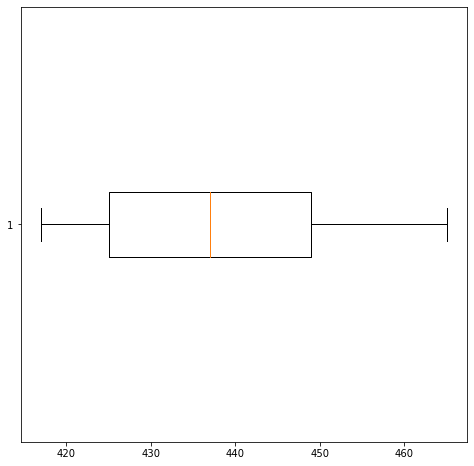

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.boxplot(p2_list_data, vert=False)  # Notice no outliers
print(end="")

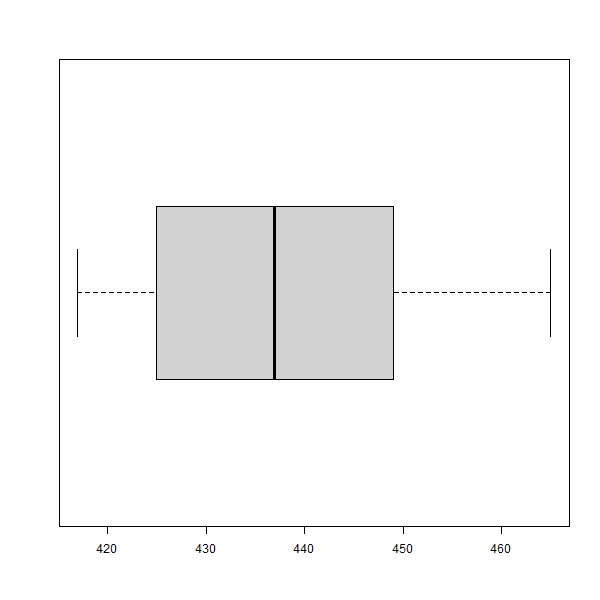

In [7]:
%%R -i p2_list_data -w 600 -h 600

# R Solution
p6_list_data <- as.numeric(p2_list_data)

boxplot(p6_list_data, horizontal=TRUE)

In [18]:
%%R -i p2_list_data -i p2_len_list

p2_vector_data <- unlist(p2_list_data, use.names = FALSE)

p2_c_upperbound = mean(p2_vector_data) + qt(.975, 17 -1 ) * sd(p2_vector_data)/sqrt(p2_len_list)
p2_c_lowerbound = mean(p2_vector_data) - qt(.975, 17 -1 ) * sd(p2_vector_data)/sqrt(p2_len_list)
print(p2_c_lowerbound)
print(p2_c_upperbound)

[1] 430.4675
[1] 446.1207


In [9]:
# probelm 3

In [10]:
%%R
8.47 - qt(.95, 20-1) * .74/sqrt(20)

[1] 8.183882


In [11]:
%%R
8.47 - qt(.95, 20-1) * .74 * sqrt(1 + 1/20)

[1] 7.158843


In [12]:
# probelm 4


In [13]:
%%R
p4_lowerbound = 26 - qt(.975, 17-1) * 3.3/sqrt(17)

p4_upperbound = 26 + qt(.975, 17-1) * 3.3/sqrt(17)

print(p4_lowerbound)
print(p4_upperbound)

[1] 24.3033
[1] 27.6967


In [14]:
%%R

p4_lowerbound = 26 - qt(.975, 17-1) * 3.3 * sqrt(1 + 1/17)

p4_upperbound = 26 + qt(.975, 17-1) * 3.3 * sqrt(1 + 1/17)

print(p4_lowerbound)
print(p4_upperbound)

[1] 18.8015
[1] 33.1985


In [15]:
# DEVORESTAT9 7.E.044.
# 5

In [16]:
%%R


## NOTICE THE THAT UPPER REQUIRES THE chisq of teh LOWER
p5_upperbound = (6 - 1)*(2.86)^2/(qchisq(.025, 6- 1))

p5_lowerbound = (6 - 1)*(2.86)^2/(qchisq(.975, 6- 1))


print(p5_lowerbound)
print(p5_upperbound)

[1] 3.187064
[1] 49.20287


In [17]:
%%R


print(sqrt(p5_lowerbound))
print(sqrt(p5_upperbound))

[1] 1.785235
[1] 7.014476
